In [1]:
import numpy as np 
import pandas as pd 
from optim import *
from matplotlib import pyplot as plt

# Overview

This note aims to check how robust are our simulations to changing the number of years between periods where we solve the model. 

# Check Expected Value by Scenario and Take-up

For each respondent and scenario we compute the expected value. We then look at the utility gain from purchasing each 12 products offered. We also look at optimal take up. 

I mostly wanted to do checks, so I used what would likely be sensible parameter values. Preferences for this exercise are given by 

``` python
varepsilon= 4.0, d_varepsilon=1.0, gamma = 0.5, d_gamma=1.5, rho = 0.7, b_x = 0.0, d_b_x = 5.0, b_k = 110.7,
nu_c0 = 1.0, nu_c1 = 0.5, nu_c2 = 0.32, nu_h0 = 1.0, nu_h1 = 0.3, d_nu_h = 0.5, beta = 0.97
```

Lines of credit on home equity are still turned off. First, we look at $n=1$

In [2]:
df = pd.read_csv('output/values_ref.csv')
pd.set_option('display.max_rows', 500)

In [3]:
for i in range(1,13):
	df['d_value_'+str(i)] = df['value_'+str(i)] - df['value_0']

In [4]:
for i in range(1,13):
	df['buy_'+str(i)] = df['d_value_'+str(i)]>0

<AxesSubplot:>

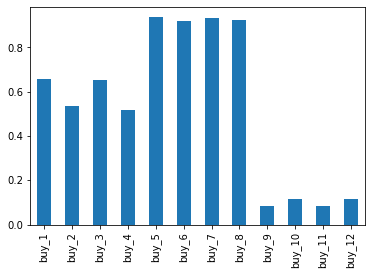

In [5]:
df[['buy_'+str(i) for i in range(1,13)]].mean().plot.bar()

Here is with $n=5$

In [6]:
df5 = pd.read_csv('output/values_ref_n_5.csv')
for i in range(1,13):
	df5['d_value_'+str(i)] = df5['value_'+str(i)] - df5['value_0']
for i in range(1,13):
	df5['buy_'+str(i)] = df5['d_value_'+str(i)]>0

<AxesSubplot:>

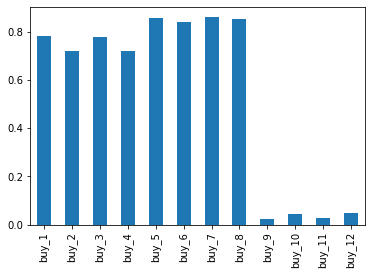

In [7]:
df5[['buy_'+str(i) for i in range(1,13)]].mean().plot.bar()

There is a bit more take-up of annuities with $n=5$ but for RMR and LTCI, things are similar. 

# Simulated Profiles

For each respondent, we simulate once the outcomes using decision rules computed optimally. We do this from their current age to a maximum of 40 periods. First, we use n=1. 

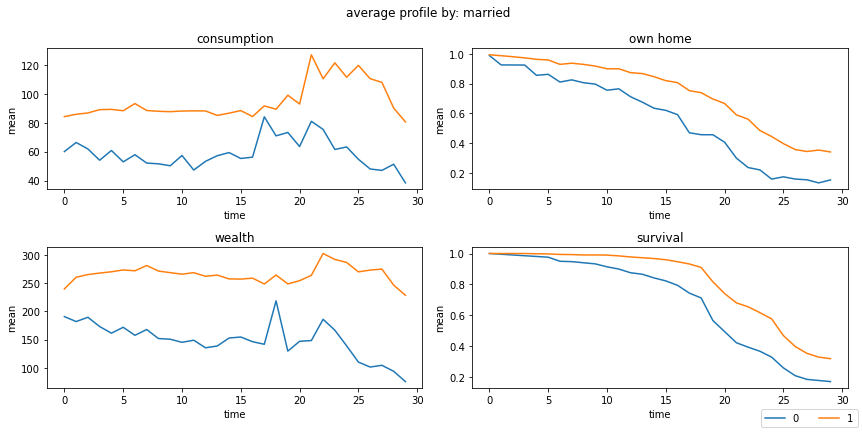

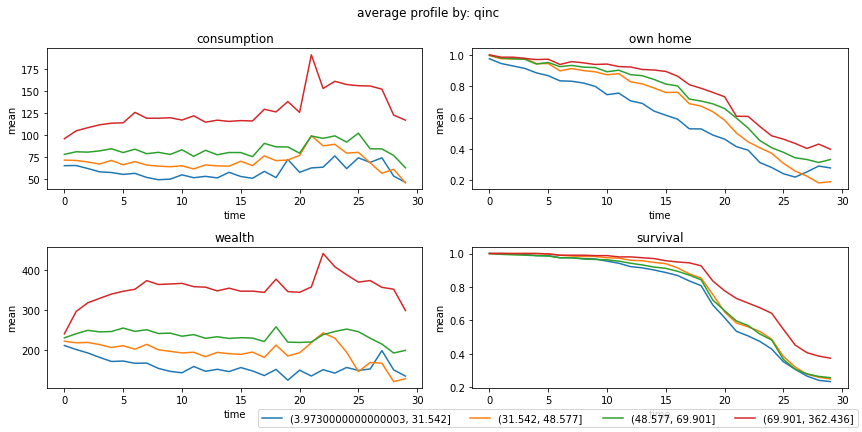

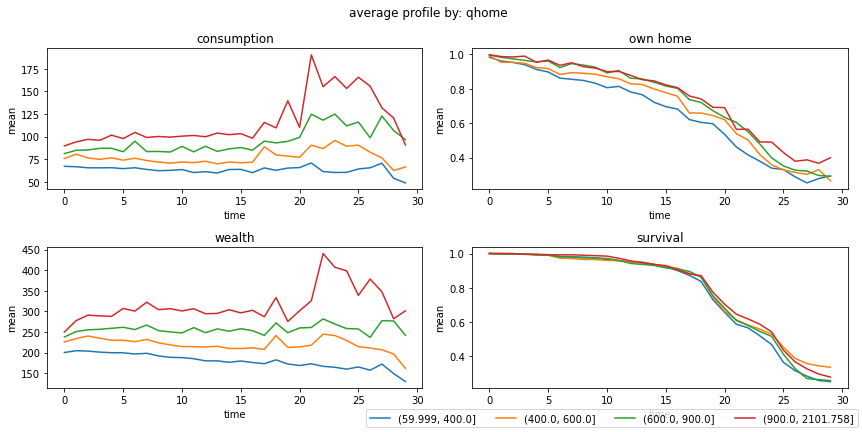

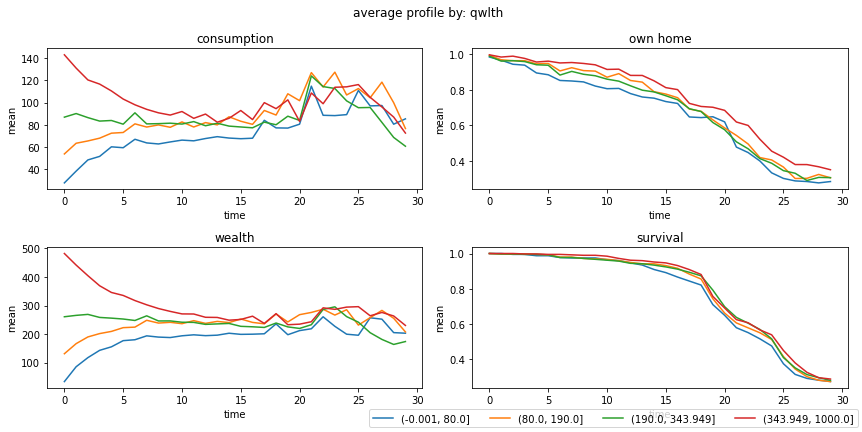

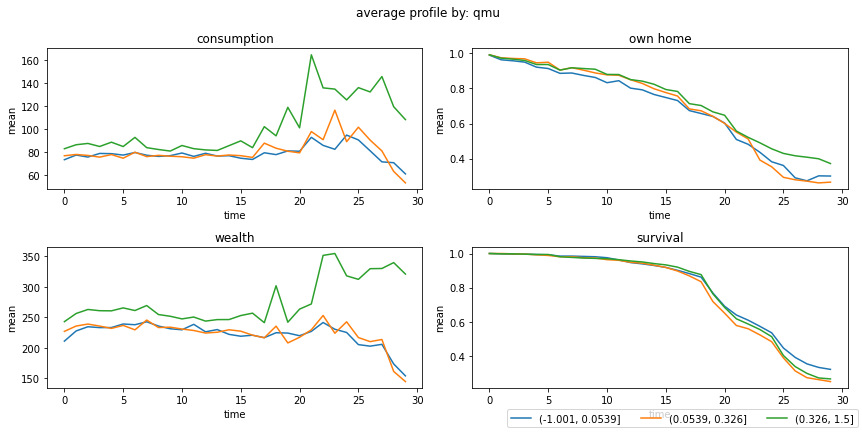

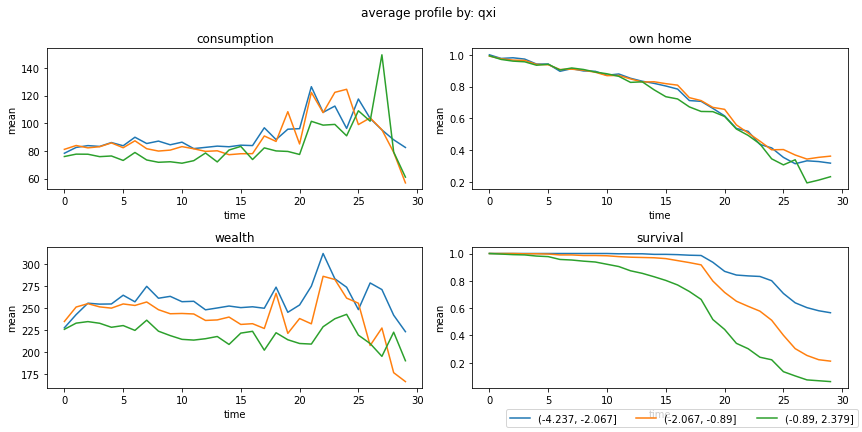

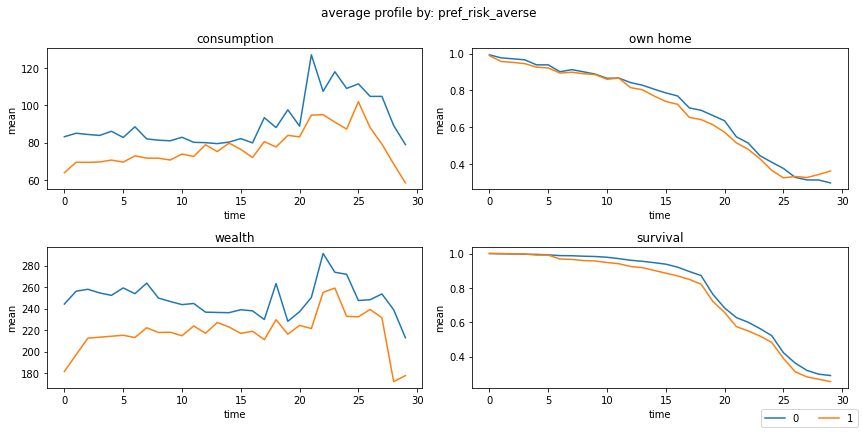

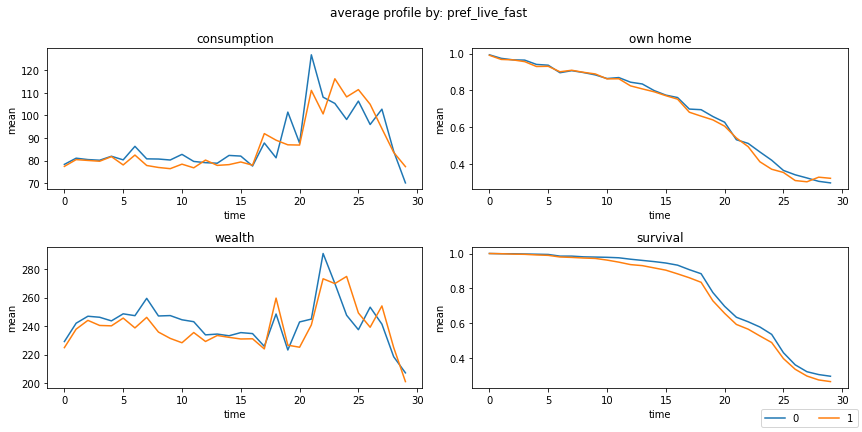

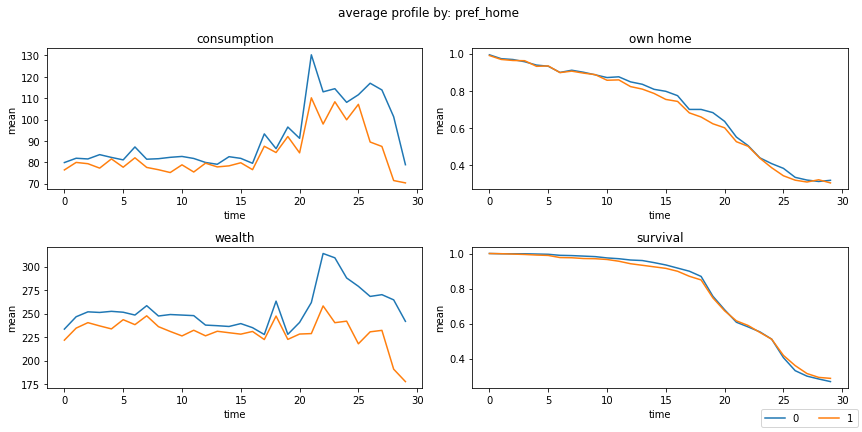

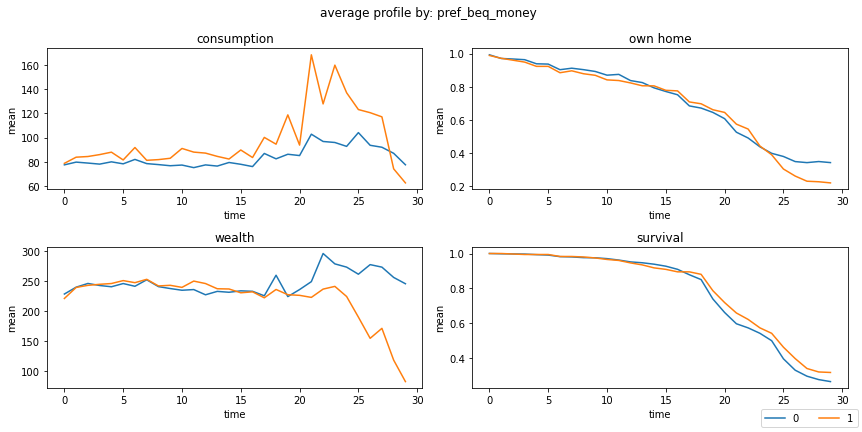

In [8]:
df = pd.read_csv('output/simulated_ref.csv')
df['qinc'] = pd.qcut(df['totinc'],q=4)
df['qhome'] = pd.qcut(df['home_value'],q=4)
df['qwlth'] = pd.qcut(df['wealth_total'],q=4)
df['qmu'] = pd.qcut(df['mu'],q=3)
df['qxi'] = pd.qcut(df['xi'],q=3)
for a in np.arange(40):
	df['surv_'+str(a)] = np.where(~df['cons_'+str(a)].isna(),1,0)
vars_list = ['married','qinc','qhome','qwlth','qmu','qxi','pref_risk_averse','pref_live_fast','pref_home','pref_beq_money']
cut_time = 30
for v in vars_list:
	if v in df.columns:
		fig, ax = plt.subplots(2,2,figsize=(12, 6))
		dv = df[['cons_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,0].plot(dv.index,dv[c],label=c)
		ax[0,0].set_title('consumption')
		dv = df[['own_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,1].plot(dv.index,dv[c],label=c)
		ax[0,1].set_title('own home')
		dv = df[['wlth_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,0].plot(dv.index,dv[c],label=c)
		ax[1,0].set_title('wealth')
		dv = df[['surv_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,1].plot(dv.index,dv[c],label=c)
		ax[1,1].set_title('survival')
		fig.suptitle('average profile by: '+v)
		lines_labels = fig.axes[0].get_legend_handles_labels()
		fig.legend(lines_labels[0], lines_labels[1],ncol=4,loc="lower right")
		for a in ax.flat:
			a.set(xlabel='time', ylabel='mean')
		plt.tight_layout() 
		fig.show()

Next, we check with $n=5$. 

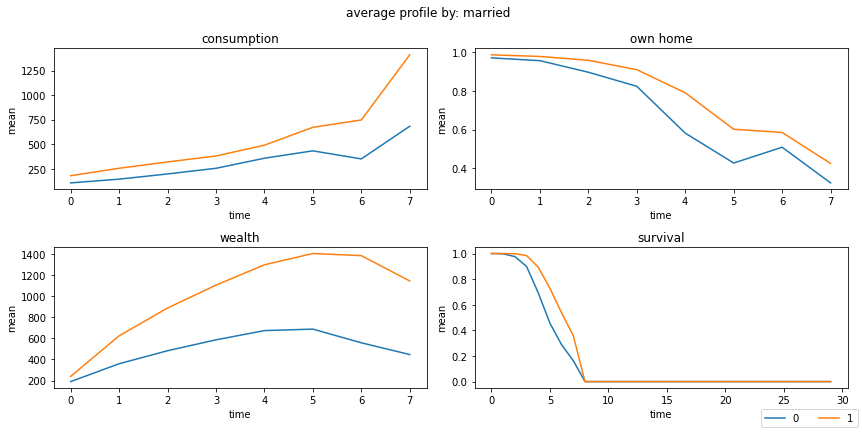

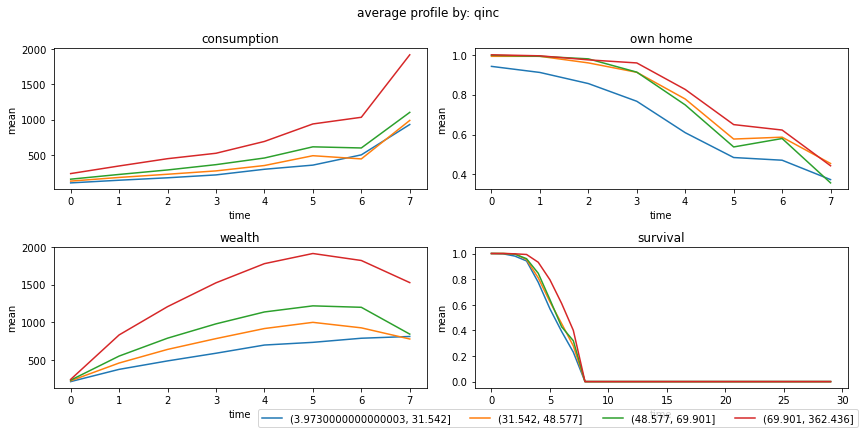

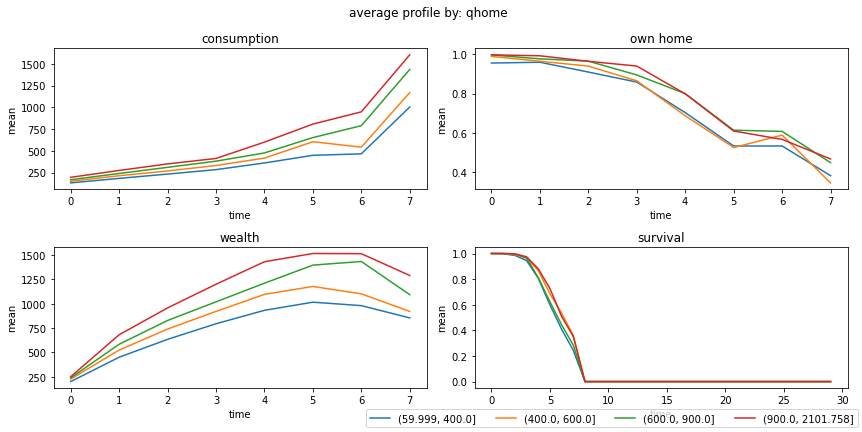

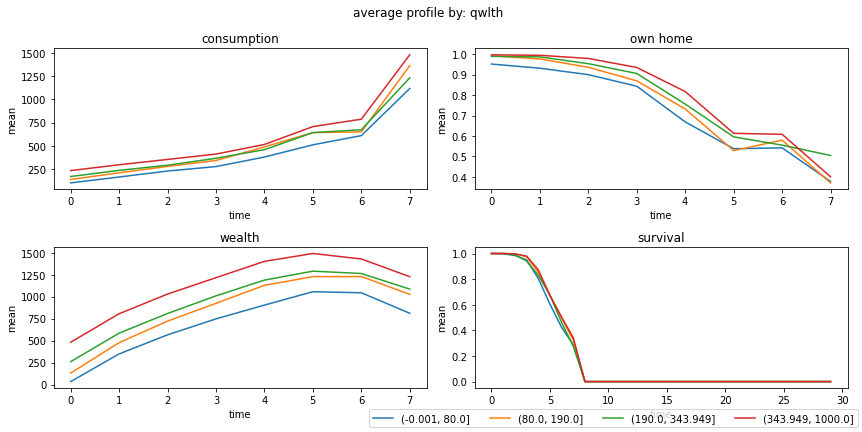

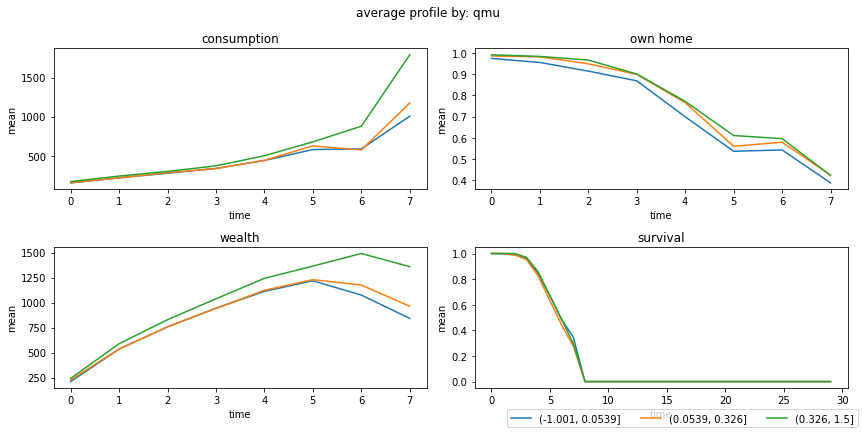

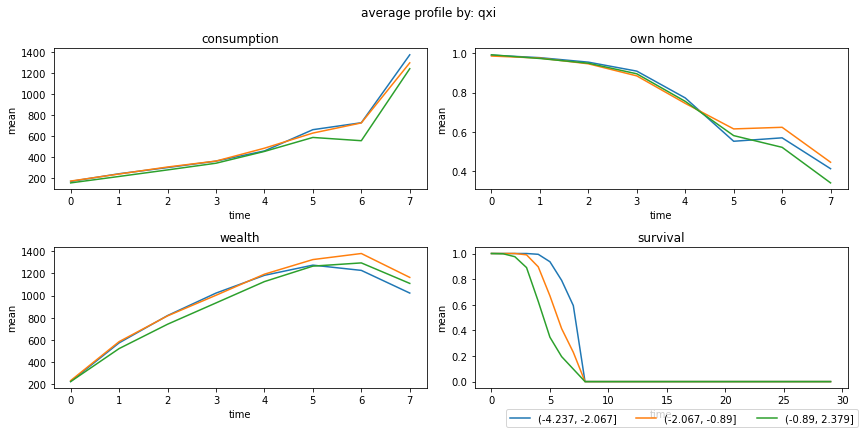

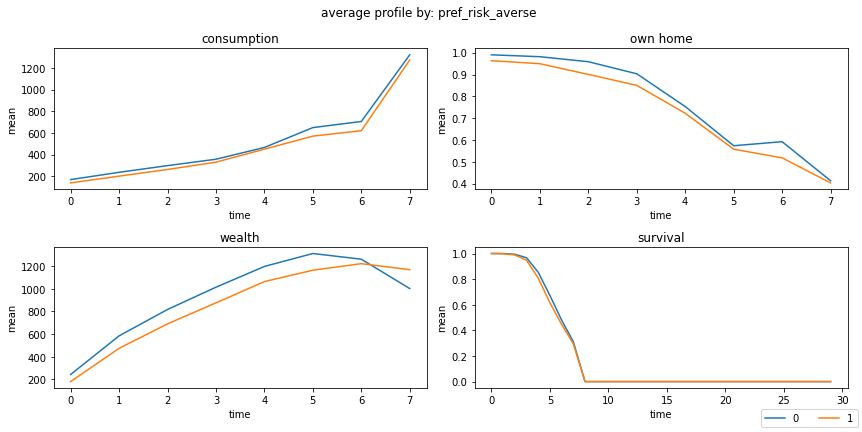

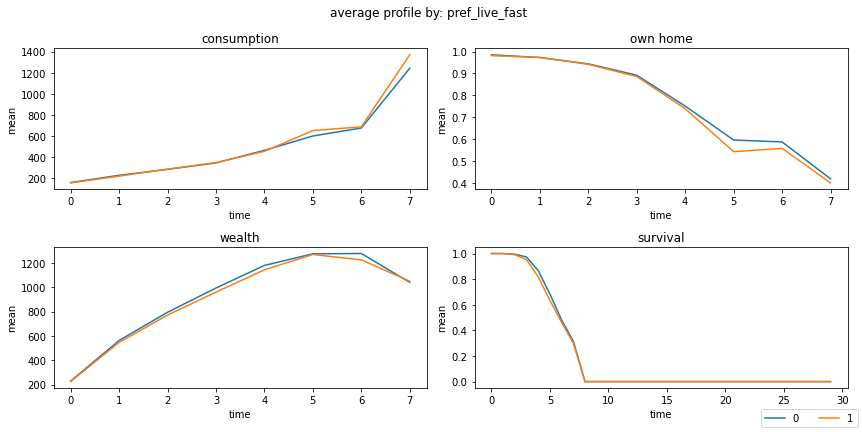

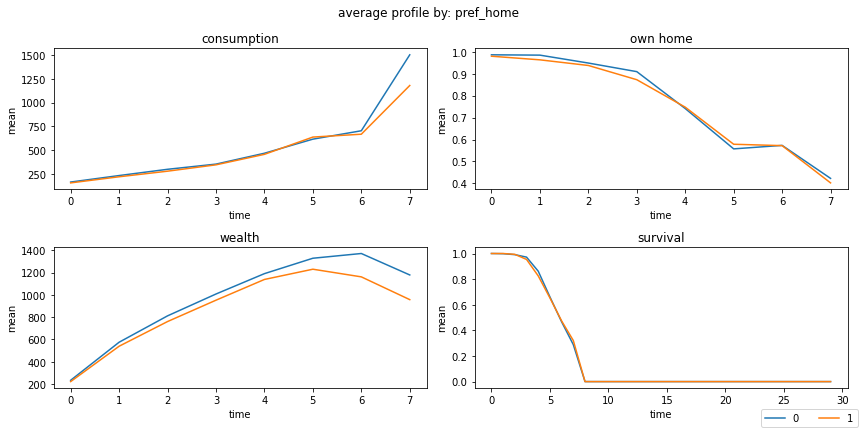

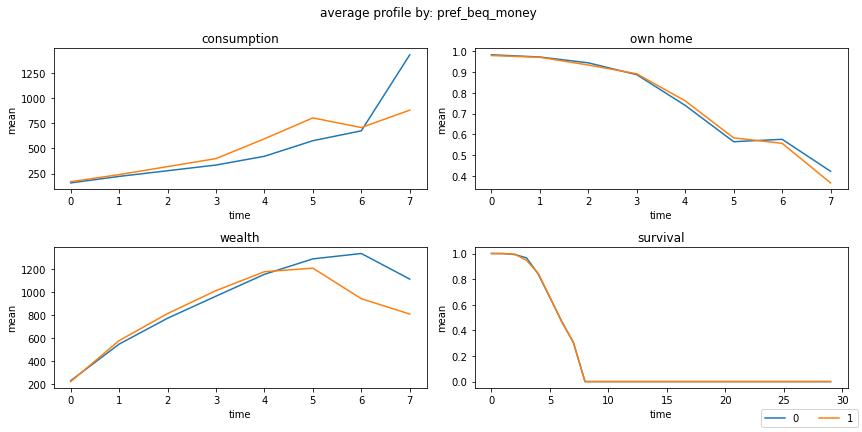

In [9]:
df = pd.read_csv('output/simulated_ref_n_5.csv')
df['qinc'] = pd.qcut(df['totinc'],q=4)
df['qhome'] = pd.qcut(df['home_value'],q=4)
df['qwlth'] = pd.qcut(df['wealth_total'],q=4)
df['qmu'] = pd.qcut(df['mu'],q=3)
df['qxi'] = pd.qcut(df['xi'],q=3)
for a in np.arange(40):
	df['surv_'+str(a)] = np.where(~df['cons_'+str(a)].isna(),1,0)
vars_list = ['married','qinc','qhome','qwlth','qmu','qxi','pref_risk_averse','pref_live_fast','pref_home','pref_beq_money']
cut_time = 30
for v in vars_list:
	if v in df.columns:
		fig, ax = plt.subplots(2,2,figsize=(12, 6))
		dv = df[['cons_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,0].plot(dv.index,dv[c],label=c)
		ax[0,0].set_title('consumption')
		dv = df[['own_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[0,1].plot(dv.index,dv[c],label=c)
		ax[0,1].set_title('own home')
		dv = df[['wlth_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,0].plot(dv.index,dv[c],label=c)
		ax[1,0].set_title('wealth')
		dv = df[['surv_'+str(x) for x in range(cut_time)]].groupby(df[v]).mean().transpose()
		dv.index = np.arange(cut_time)
		for c in dv.columns:
			ax[1,1].plot(dv.index,dv[c],label=c)
		ax[1,1].set_title('survival')
		fig.suptitle('average profile by: '+v)
		lines_labels = fig.axes[0].get_legend_handles_labels()
		fig.legend(lines_labels[0], lines_labels[1],ncol=4,loc="lower right")
		for a in ax.flat:
			a.set(xlabel='time', ylabel='mean')
		plt.tight_layout() 
		fig.show()

Clearly, we do not have the same profiles. Wealth seems to ramp up much more quickly with $n=5$. There must be an error with the time aggregation. 